# Project: Forest Cover Type
## Supervised Learning, Classification

----
## Table of Contents

- [Description](#description)
- [Getting Started](#Getting-Started)
- [Data Exploration](#Data-Exploration)
 - [Feature Statistics](#Feature-Statistics)
 - [Feature Visualization](#Feature-Visualization)
- [Data Engineering](#Data-Engineering)
 - [Feature Cleaning](#Feature-Cleaning)
 - [Observation Cleaning](#Observation-Cleaning)
 - [Duplicates Deleting](#Duplicates-Deleting)
 - [Feature Scaling](#Feature-Scaling)
- [Developing a Model](#Developing-a-Model)

 
-----

## Description

A short description I want to give of how I am going to solve this project before starting. Our goal in this project is to classify which forest type it is from the data given.

- This study area includes 4 Wilderness Areas located in the Roosevelt National Forest of Northern Colorado. These area represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological process rather than forest management practices.

- Each observation is 30m x 30m forest cover type determined from US Forest Service (USFS) Region 2 Resource Information System (RIS) data. Independent variables were derived from the data originally obtained from US Geological Survey (USGS) and USFS data.

- I have been given a total of 54 attributes/features, (excluding 1 target variable) these attributes contain Binary and Quantative attributes, and I need to predict which Forest Cover-Type is it from the given features.

- I will first explore the data, visualize it, know what the data wants to tell us. Remove any missing values and features that have null values and scale the data within a specific range.

- Split the data 75%-25%, train-test set respectively. Will use 10 K-fold Cross Validation on train set.

- Feed the training data to the Naive Bayes (Our Benchmark Model) and evaluate the result on the test set.

- Training will be done on the Solution Models that I have chose, those are:-
    - Support Vector Machines (SVM),
    - K-Nearest Neighbour (KNN), 
    - Random Forest (RF) and 
    - Stochastic Gradient Descent Classifier (SGDC)
    
    All these models will be boosted with Adaboost (Adaptive Boosting) boosting algorithm since we have uneven number of observation of classes in the target varaible.
 
- Scores will be evaluated with Accuracy, Precision, Recall and F1 score metrics.

- Choosing the best model from above based on metrics scores and testing that model on the test set.

- Conclusions

Detailed Info regarding the how I am going approach the problem and data summary is given in `proposal.pdf` file. [Visit](https://github.com/JuzerShakir/Forest_Cover-Type/blob/master/proposal.pdf)

In [1]:
# Importing required libraries for the project
import sys # for python library version
import numpy as np # for scientific computing
import pandas as pd # for data anaysis
import matplotlib # for visualization
import seaborn as sns # for visualization
import sklearn # ML Library

In [2]:
print('Python: {}'.format(sys.version))  # Python version
print('numpy: {}'.format(np.__version__))  # Numpy version
print('pandas: {}'.format(pd.__version__))  # Pandas version
print('matplotlib: {}'.format(matplotlib.__version__))  # Matplotlib version
print('sklearn: {}'.format(sklearn.__version__))  # sklearn version
print('seaborn: {}'.format(sns.__version__))  # seaborn version

Python: 3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 11:27:44) [MSC v.1900 64 bit (AMD64)]
numpy: 1.15.0
pandas: 0.23.4
matplotlib: 2.2.3
sklearn: 0.19.1
seaborn: 0.9.0


## Getting Started
First thing first, we need to import the dataset and have a peak at it....

In [3]:
# importing the dataset to a variable
data = pd.read_csv("covtype.data")

# displaying first 5 observations
data.head(3)

,2596,51,3,258,0,510,221,232,148,6279,...,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,5
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2


We can see that the data has been imported successfully but there are missing column names. We need to give column names in order to keep track of columns and make sense of features and data we have.

The column names are given here on [Kaggle](https://www.kaggle.com/uciml/forest-cover-type-dataset)

In [4]:
# since the data doesn't have column names, we will provide it in a form of list
feature_names = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
                 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 
                'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7',
                'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 
                 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 
                 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 
                 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Type']

# Feeding column names to the data
data.columns = feature_names

In [5]:
# displaying first 5 observation
data.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2


Hmm, Now that makes sense. 
Now we need to know the number of observations and features we have.

In [6]:
# dimensions of the data
# where x will be no. of observation
# and y will be features including 1 target variable
x, y = data.shape

print('We have ', x, ' number of observations and ', y-1, ' features for this dataset to predict type of forest cover.')  # removing count of a target variable in 'y'

We have  581011  number of observations and  54  features for this dataset to predict type of forest cover.


Let's look at the datatypes of each feature and see if it needs any processing if the feature is not in its appropriate form..

In [7]:
# datatypes of features
data.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

Well since all are numeric integer and should be so, then we do not need to do any convertions here.

### Explaination of the data

Our dataset has `54` features, from them `10` are `numeric` and `44` are `catrgorical`. From 44 categorical, `40` are of `Soil_Type` and `4` of `Wilderness_Area`.

We have been provided the names of all `Soil_Type` and `Wilderness_Areas` for this dataset. The table below lists all the names with respect to their feature names in the column:

This information is available on [kaggle](https://www.kaggle.com/uciml/forest-cover-type-dataset), [UCI](https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.info) and in my [Proposal](https://github.com/JuzerShakir/Forest_Cover-Type/blob/master/proposal.pdf), but for convenience and have documented here too.

| Feature Name | Names |
| ------------ | ----- |
| Wilderness_Area1 | Rawah Wilderness Area |
| Wilderness_Area2 | Neota Wilderness Area |
| Wilderness_Area3 | Comanche Wilderness Area |
| Wilderness_Area4 | Cache La Poudre Wilderness Area |
| Soil_Type1 | Cathedral family - Rock outcrop complex, extremely stony |
| Soil_Type2 | Vanet - Ratake families complex, very stony |
| Soil_Type3 | Haploborolis - Rock outcrop complex, rubbly |
| Soil_Type4 | Ratake family - Rock outcrop complex, rubbly |
| Soil_Type5 | Vanet family - Rock outcrop complex, rubbly |
| Soil_Type6 | Vanet - Wetmore families - Rock outcrop complex, stony |
| Soil_Type7 | Gothic family |
| Soil_Type8 | Supervisor - Limber families complex |
| Soil_Type9 | Troutville family, very stony |
| Soil_Type10 | Bullwark - Catamount families - Rock outcrop complex, rubbly |
| Soil_Type11 | Bullwark - Catamount families - Rock land complex, rubbly |
| Soil_Type12 | Legault family - Rock land complex, stony |
| Soil_Type13 | Catamount family - Rock land - Bullwark family complex, rubbly |
| Soil_Type14 | Pachic Argiborolis - Aquolis complex |
| Soil_Type15 | _unspecified in the USFS Soil and ELU Survey_ |
| Soil_Type16 | Cryaquolis - Cryoborolis complex |
| Soil_Type17 | Gateview family - Cryaquolis complex |
| Soil_Type18 | Rogert family, very stony |
| Soil_Type19 | Typic Cryaquolis - Borohemists complex |
| Soil_Type20 | Typic Cryaquepts - Typic Cryaquolls complex |
| Soil_Type21 | Typic Cryaquolls - Leighcan family, till substratum complex |
| Soil_Type22 | Leighcan family, till substratum, extremely bouldery |
| Soil_Type23 | Leighcan family, till substratum, - Typic Cryaquolls complex. |
| Soil_Type24 | Leighcan family, extremely stony |
| Soil_Type25 | Leighcan family, warm, extremely stony |
| Soil_Type26 | Granile - Catamount families complex, very stony |
| Soil_Type27 | Leighcan family, warm - Rock outcrop complex, extremely stony |
| Soil_Type28 | Leighcan family - Rock outcrop complex, extremely stony |
| Soil_Type29 | Como - Legault families complex, extremely stony |
| Soil_Type30 | Como family - Rock land - Legault family complex, extremely stony |
| Soil_Type31 | Leighcan - Catamount families complex, extremely stony |
| Soil_Type32 | Catamount family - Rock outcrop - Leighcan family complex, extremely stony |
| Soil_Type33 | Leighcan - Catamount families - Rock outcrop complex, extremely stony |
| Soil_Type34 | Cryorthents - Rock land complex, extremely stony |
| Soil_Type35 | Cryumbrepts - Rock outcrop - Cryaquepts complex |
| Soil_Type36 | Bross family - Rock land - Cryumbrepts complex, extremely stony |
| Soil_Type37 | Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony |
| Soil_Type38 | Leighcan - Moran families - Cryaquolls complex, extremely stony |
| Soil_Type39 | Moran family - Cryorthents - Leighcan family complex, extremely stony |
| Soil_Type40 | Moran family - Cryorthents - Rock land complex, extremely stony |


Yeah! I know! Sorry, I didn't get to pick names! But just given here for reference for curious people who might be wondering what type of Wilderness and Soil does the forest have. 

We will stick to the current feature names and not change it for ease! Later, if necessory, we might take a look at this if we see some feature catch our interests.

Just to clarify, the categorical variable we have here is 2. And these alone have 44 features. But an observation can only have presence of any 2 feature from 44, 1 for Soil and 1 for Wilderness. So if an observation has `'1'` in `Wilderness_Area4` and `'1'` in `Soil_Type12`, it means that it's respective Soil and Wilderness is present, while all other 42 features will have `'0'` hence its absence. And this is what a categorical feature means. And also these are `one-hot encoded` for us, so thanks to the authors!

Talking about numeric features, 2, `Aspect` and `Slope` have measurement in `degrees` while 3 `Hillshade..` features have values range from `0 to 255` index, descibing summer solstice. Remaining 5 out 10 numeric features have measurement in `Meters`. 

The target variable `Cover_Type` ranges bewtween integer value `1 - 7` and each number is a key reprsenting names of different forest type. Let's look at what number represents which forest cover types.

| Key | Name |
| --- | ---- |
| 1 | Spruce / Fir |
| 2 | Lodgepole Pine |
| 3 | Ponderosa Pine |
| 4 | Cottonwood / Willow |
| 5 | Aspen |
| 6 | Douglas-fir |
| 7 | Krummholz |

We will later take a look how many observations are there for each class.

Now let's start exploring the data statistically...

-------

## Data Exploration

### Feature Statistics
In the data exploration section, we will split the data in 2 parts. First part will contain all numerical features and second part will contain all binary features of the data. The target variable `Cover_Type` is not included in any of it.

**We will look at the statistics of numerical features and extract useful info out of it.**

In [8]:
# Extracting all numerical features from data
num_fea = data.iloc[:, :10]

# extracting all binary features from data
binary_fea = data.iloc[:, 10:-1]


# statistics of numerical features
num_fea.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000
mean,2959.365926,155.656988,14.103723,269.428236,46.418935,2350.149779,212.146033,223.318701,142.528253,1980.283828
std,279.984569,111.913733,7.488234,212.549538,58.295250,1559.254343,26.769909,19.768711,38.274561,1324.184340
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000


- Mean of the feature vary from as low as 14 to as high as 2959.

- Standard deviation tells us how spread the data is from the mean, here we can see `Horizontal_Distance_To_Roadways` is the most spread out data followed by `Horizontal_Distance_To_Fire_Points` and `Elevation`. The most densed and near to mean is `Slope` followed by all 3 features of `Hillshade`. [Take a look at plot #1](#Feature-Visualization)

- All the features have minimum value of `0` except `Elevation` and `Vertical_Distance_To_Hydrology` features. Where `Elevation` has the highest minimum value and `Vertical_Distance_To_Hydrology` has the lowest, being negative.

- We can document here in detail for each feature of how spread or dense the data value is between min-25%, 25%-50%, 50%-75% and 75%--max. These are called the percentile. 25% percentile denotes first quaritle, 50% percentile is the median and 75% percentile is the third quartile. We will look in detail with the help of visualization to clearly understand it later in this project. [Take a look at plot #1](#Feature-Visualization)

- `Hillshade`s features have similar maximum value of `254` while `Horizontal_Distance_To_Fire_Points` has the highest followed by `Horizontal_Distance_To_Roadways` feature and they also have the highest ranges of all features. `Slope` having lowest maximum value and also being lowest in range followed by `Apsect` feature. 


The reason some features are so widely spread and having high values and some features don't is because 5 out of 10 variables are measured in meters, includes (`'Elevation', 'Horizontal_Distance_To_Hydrology' , Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', Horizontal_Distance_To_Fire_Points'`), so it makes sense that these have high values and ranges. Features like `Aspect` and `Slope` are measured in degrees so its maximum value can't go above 360. While `Hillshade`s features have can take on max value of 255. All these were discussed before.

To help understand this visually, [take a look at plot #1](#Feature-Visualization).

**Taking statistical look at binary or categorical features.**

In [9]:
# statistics of binary or categorical features
binary_fea.describe()

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,...,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000
mean,0.448864,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,...,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060
std,0.497379,0.220882,0.495897,0.244088,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,...,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121792
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Since here all the values can only be either 0 and 1. The mean can tell us useful information here. `Wilderness_Area1` has the highest mean followed by `Wilderness_Area3`, this means that `Wilderness_Area1` has the most presence in the data compared to other Wilderness Areas. In other words, most observation have features either `Wilderness_Area1` or `Wilderness_Area3`. The least amount of observation will be seen from `Wilderness_Area2`. We will visualize this and `Soil_Type` features later for better understanding these data in `Feature Visualization` section. [Take a look at plot #3](#Feature-Visualization)

- One more thing to notice here is that when we add all the mean of `Wildernesss_Area`s `0.448864 + 0.051434 + 0.436074 + 0.063627` we get result `0.999999` which is approximately `1`. This actually makes sense because all the observations can be from any one Wilderness area. I have programmed to check whether any obsevation has 2 Soil types at the same time or None for assurance that our data is in appropriate form. I will do this in `Data Engineering` section.

- Hence if we look at this in the probability perspective we can say that, the next observation that we get has `44.8%` probability that its been taken from `Wilderness_Area1`, `43.6%` probability that it's taken from `Wilderness_Area3` and so on for others. [Take a look at plot #2](#Feature-Visualization)

- We can document same for `Soil_Type`s too.  [Take a look at plot #3](#Feature-Visualization)

By looking at these statistics of two different data types and since the features have different spreads and uneven amount of distribution, we will feature scale these so that all the feature have similar ranges between 0 and 1. Some algorithm are very sensitive to high values hence giving us inapprpraite results while some algorithms are not. Do be on safe side we will feature scale it and we will do this in `Data Engineering` Section.

**Exploring Skewness of each features:**

In [10]:
# skew distribution
data.skew()

Elevation                              -0.817602
Aspect                                  0.402625
Slope                                   0.789274
Horizontal_Distance_To_Hydrology        1.140436
Vertical_Distance_To_Hydrology          1.790248
Horizontal_Distance_To_Roadways         0.713678
Hillshade_9am                          -1.181144
Hillshade_Noon                         -1.063054
Hillshade_3pm                          -0.277052
Horizontal_Distance_To_Fire_Points      1.288636
Wilderness_Area1                        0.205622
Wilderness_Area2                        4.061591
Wilderness_Area3                        0.257819
Wilderness_Area4                        3.575557
Soil_Type1                             13.736658
Soil_Type2                              8.615351
Soil_Type3                             10.838621
Soil_Type4                              6.625170
Soil_Type5                             18.995227
Soil_Type6                              9.240053
Soil_Type7          

- We can see that `Soil_Type15` has the highest positive skewness meaning the mass of the distribution is concentrated to the left and has long tail to the right. This is also called `right skewed distribution`. Where mode of the feature is to the left most followed by median and mean. [Take a look at plot #3](#Feature-Visualization)

- `Elevation` and `Hillshade`s having negatively skewed distibution is the opposite in appearance to the positively skewed where mode is to the right most followed by meadian and mean.

- ML algothims can be very sensitive to such ranges of data and can give us inappropriate or weak results. Feature Scaling will handle these as discussed earlier.

**Class Distributiion:**

Let's take a look how each class is distributed..

In [11]:
# grouping by forest cover type and calculating total occurance
data.groupby('Cover_Type').size()

Cover_Type
1    211840
2    283301
3     35754
4      2747
5      9492
6     17367
7     20510
dtype: int64

- We have uneven samples of forest cover type, where `Lodgepole Pine (2)` has the highest no. of observation followed by `Spruce (1)`. Only these 2 cover types add up to `495,141` number of observations out of `581,011` total which covers approx `85.2%` of data.

- Feeding with such uneven distribution of data to an algorithm will not help them learn more about features like `Cottonwood (4)` and `Aspen (5)` where they have least amount of observation as strongly as features with high amount of observations hence making the algorithm weak learners giving low metrics scores. 

- To avoid this I will apply Adaboost boosting algorithm to our chosen models.

Enough of looking at bunch of numbers! Lets Visualize them...!

### Feature Visualization

Visualizing the spread and outliers of the data of numerical features.

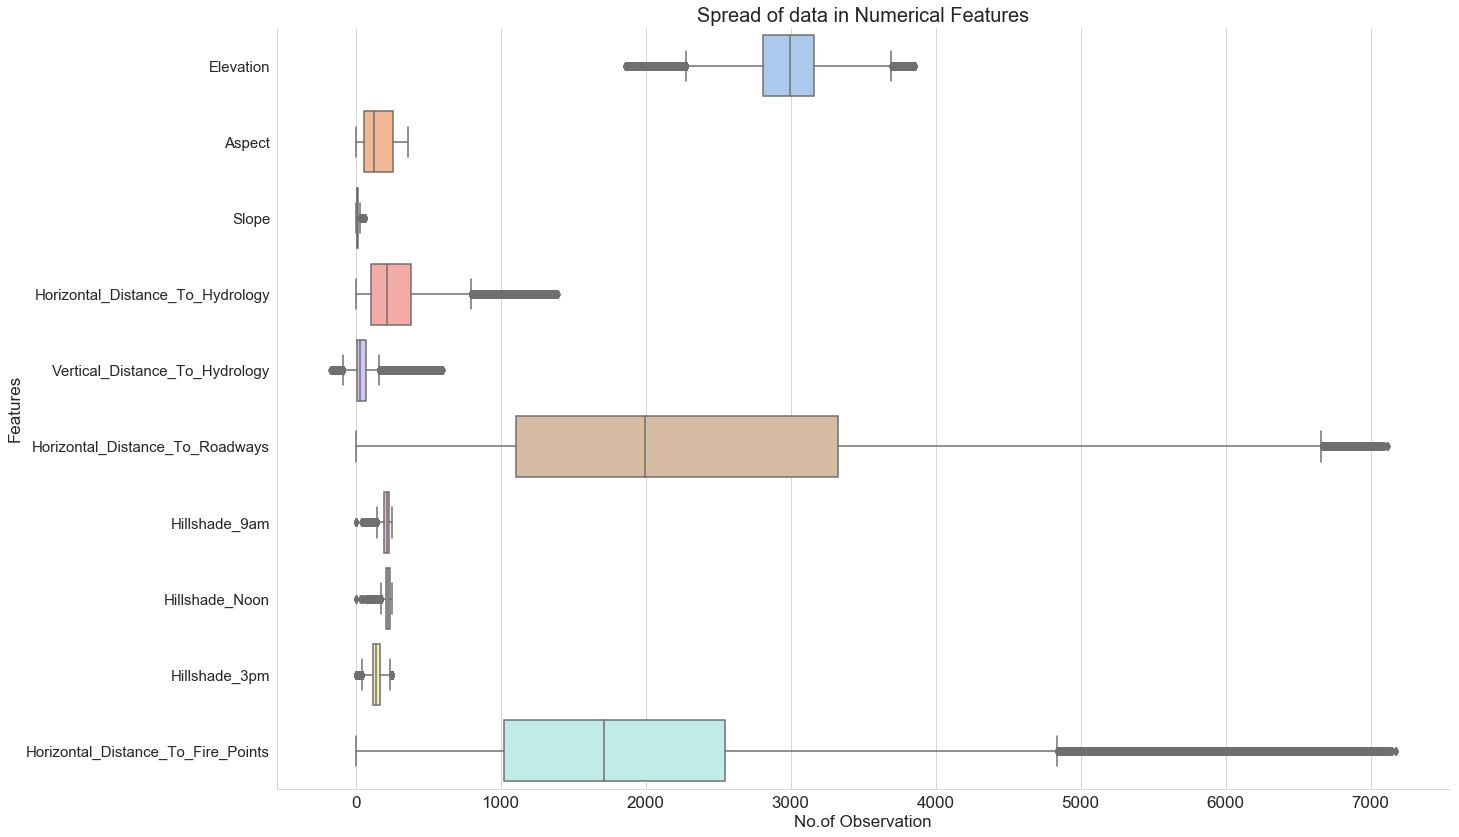

In [30]:
#####    1    ######
# Box and whiskers plot
# Spread of numerical features

# importing pyplot module from matplotlib to plt
plt = matplotlib.pyplot

# plot bg
sns.set_style("whitegrid")

#Size of the plot
plt.subplots(figsize=(21, 14))

# setting color of the plot
color = sns.color_palette('pastel')

# Using seaborn to plot it horizontally with 'color'
sns.boxplot(data = num_fea, orient='h', palette=color)

# Uncomment below code to visualize where every single data observation of the features lie in the plot 
#sns.swarmplot(data = num_fea)  #WARNING THIS WILL TAKE LOTS OF TIME DEPENDING ON CPU POWER AND RAM YOU HAVE  !!

# Title of the graph
plt.title('Spread of data in Numerical Features', size = 20)

# Horizontal axis Label
plt.xlabel('No.of Observation', size = 17)
# Vertical axis Label
plt.ylabel('Features', size = 17)

# x-axis label size
plt.xticks(size = 17)
#y-axis label size
plt.yticks(size = 15)

# removing the top and right axes spines, which are not needed
sns.despine()

# display plot
plt.show()

- As explained by me in [feature statistics](#Feature-Statistics), `Slope` is the most squeezed box plot feature! It's densely packed taking on least range compared to all features. Having little range means `mean` and `median` will be quite close and we saw that before in the table, has a difference of approx 1. It does have a few outliers though.

- `Aspect` feature is the only one which do not have any outliers having a range of 360. Since both `Aspect` and `Slope` are measured in degrees, `Aspect` takes on much bigger range than `Slope` because it has lowest max score, hence `Aspect` is much less densed than `Slope`. The `first 50%` of the data, from `min to meadian` is more densed than the `last 50%`, its more spread out.

- `Hillshade`s feature also having similar plot like `Slope` including many outliers and taking on smaller range. Similiar plot is for `Vertical_Distance_To_Hydrology` except here the minimum value is negative as we had seen in the table.

- `Elevation` and `Horizontal_Distance_To_Hydrology` are the only features that doesn't have minimum value of 0. `Elevation` instead is plotted in middle having many outliers too.

- `Horizontal_Distance_To_Roadways` is the most spread data of all features because it has the highest standard deviation score followed by `Horizontal_Distance_To_Fire_Points` though this feature has the maximum value. We can see visually only how spread these are and which one is most. `Horizontal_Distance_To_Fire_Points` may be having largest number of outliers I guess from this plot. If we compare these two features, the last 50% of the data of `Horizontal_Distance_To_Roadways` is much more spread and less dense compared to `Horizontal_Distance_To_Fire_Points` , hence having high standard deviation score.

Now, lets plot how `Wilderness_Area`s are distributed. As we saw earlier in [feature statistics](#Feature-Statistics), the mean of `Wilderness_Area1` and `Wilderness_Area3` were highest which meant there presence were high. Now lets see if thats the case visually.

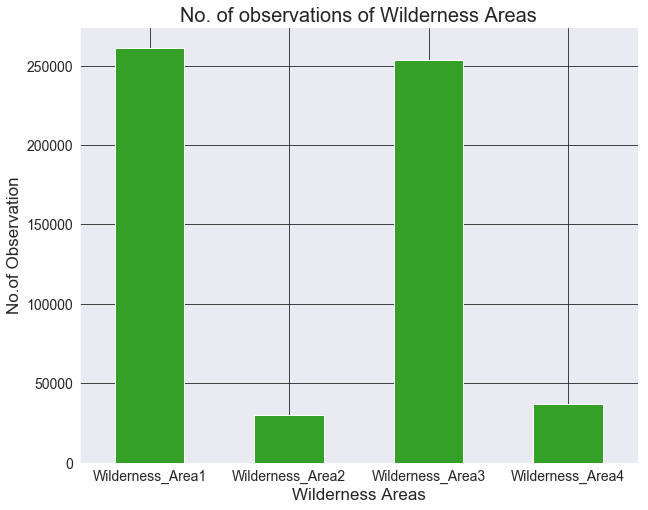

In [46]:
####    2    #####
# Bar plot
# Wilderness Area Count

# plot bg
sns.set_style("darkgrid", {'grid.color': '.1'})

# list of colors
flatui = ["#e74c3c", "#34495e", "#2ecc71","#3498db"]
# using seaborn, passing color to palette
color = sns.color_palette(flatui)

# select all rows and first 4 columns, plot bar with given given size using color defined
binary_fea.iloc[:,:4].sum().plot(kind='bar', figsize=(10, 8), color='#34a028')

# Title of the graph
plt.title('No. of observations of Wilderness Areas', size = 20)

# Horizontal axis Label
plt.xlabel('Wilderness Areas', size = 17)
# Vertical axis Label
plt.ylabel('No.of Observation', size = 17)

# x-axis label size, setting label rotations
plt.xticks(rotation = 'horizontal', size = 14)
# y-axis label size
plt.yticks(size = 14)

# removing the top and right axes spines, which are not needed
sns.despine()

# display plot
plt.show()

As I had said earlier, `Wilderness_Area1` has the most presence followed by `Wilderness_Area3`, both have quite close observations and so were their mean value. `Wilderness_Area2` having the least observation. Lets see their exact values for precision.

In [14]:
# total count of each Wilderness Area
binary_fea.iloc[:,:4].sum()

Wilderness_Area1    260795
Wilderness_Area2     29884
Wilderness_Area3    253364
Wilderness_Area4     36968
dtype: int64

- The difference of observations between `Wilderness_Area1` and `Wilderness_Area3` is approximately 7k. 

- `Wilderness_Area2` and `Wilderness_Area4` may seem to have less observation but its not, as they have `~29k` and `~36k` observations respectively. Which is very good amount of observations. 


**Now Let's see similar visualization for `Soil Types`**

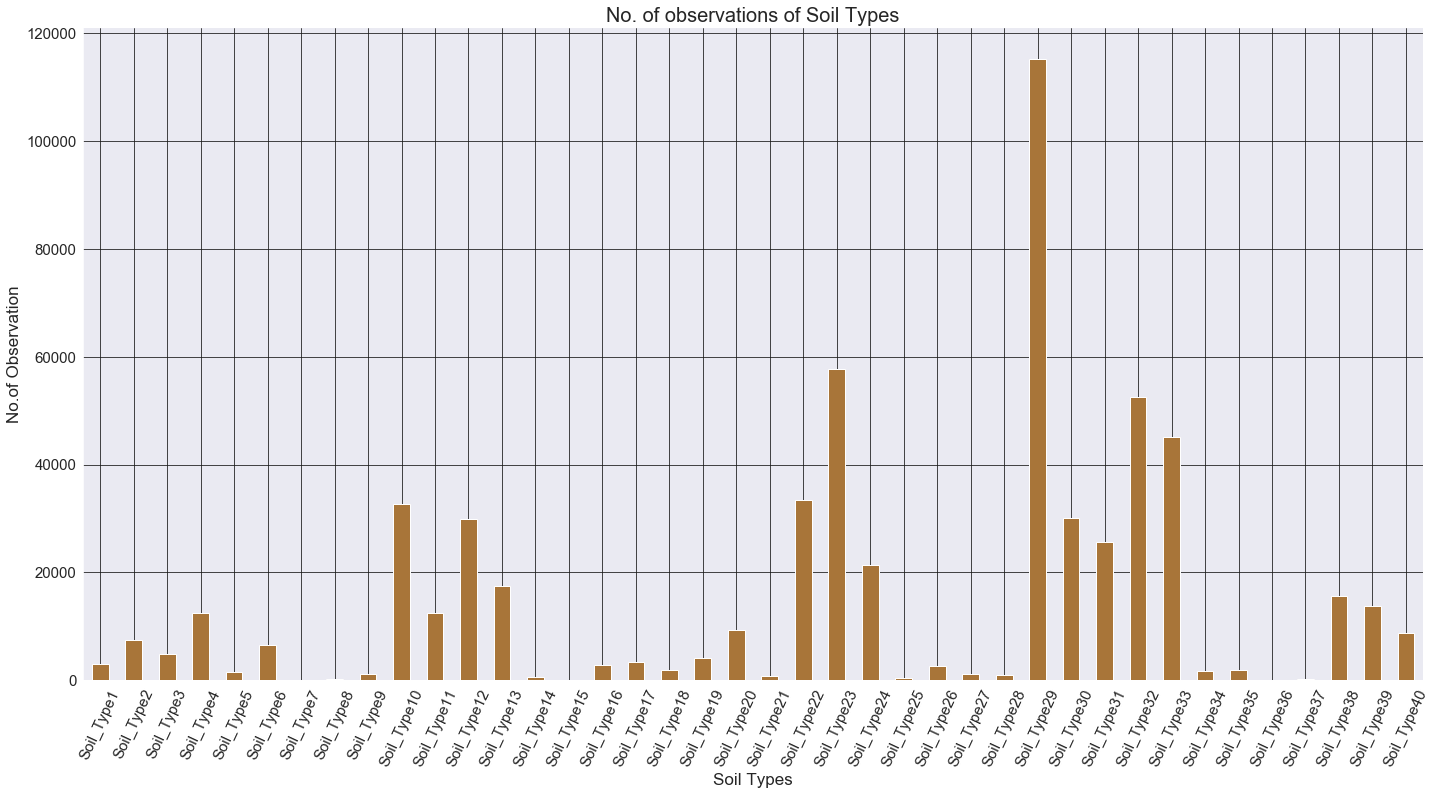

In [45]:
####    3    #####
# Bar plot
# Soil Type Count

# plot bg
sns.set_style("darkgrid", {'grid.color': '.1'})


# select all rows and first 4 columns, plot horizontal bar with given size using color defined
binary_fea.iloc[:,4:].sum().plot(kind='bar', figsize=(24, 12), color='#a87539')

# Title of the graph
plt.title('No. of observations of Soil Types', size = 20)

# Horizontal axis Label
plt.xlabel('Soil Types', size = 17)
# Vertical axis Label
plt.ylabel('No.of Observation', size = 17)

# x-axis label size, setting label rotations
plt.xticks(rotation = 65, size = 15)
# y-axis label size
plt.yticks(size = 15)

# removing the top and right axes spines, which are not needed
sns.despine()

# display plot
plt.show()

In [16]:
binary_fea.loc[:,'Soil_Type29'].describe()

count    581011.000000
mean          0.198354
std           0.398761
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Soil_Type29, dtype: float64

- Looking at the visualization above the first thing I notice that there are visualization of `normal distribution`, `bimodal distribution`, `Unimodal Distribution` and `Left and Right-skewed distribution` showing up in pieces. In short we see all kinds of distributions here!!

- Distribution Observation from Left-Right:
    - The left-most appears to have mostly Normal distribution (`Soil_Type1` - `Soil_Type6`).
    - Unimodal Distribution (`Soil_Type7` - `Soil_Type8`)
    - We see a bimodal distribution (`Soil_Type19` - `Soil_Type14`).
    - Left Skewed Distribution (`Soil_Type15` - `Soil_Type21`).
    - Normal Distribution (`Soil_Type22` - `Soil_Type24`).
    - Right Skewed Distribution (`Soil_Type25` - `Soil_Type28`)
    - Mixture of Right Skewed and Bimodal (`Soil_Type29` - `Soil_Type33`).
    - Normal Distribution (`Soil_Type34` - `Soil_Type35`).
    - Normal Distribution (`Soil_Type36` - `Soil_Type37`).
    - Right Skewed Distribution (`Soil_Type38` - `Soil_Type40`)
    
    
- The most observation is seen from `Soil_Type29` followed by `Soil_Type23`, `Soil_Type32` and `Soil_Type33`. As from statistical analysis done of `Soil_Type29`, it shows that the mean is `~0.198` which mean it alone has presence in approximately `20%` of observations in our data. It also had the least skewed value of all in `Soil Types` as we had seen earlier in Data Exploration.

**Let's see the exact number and descending order of observations of `Soil Types`**

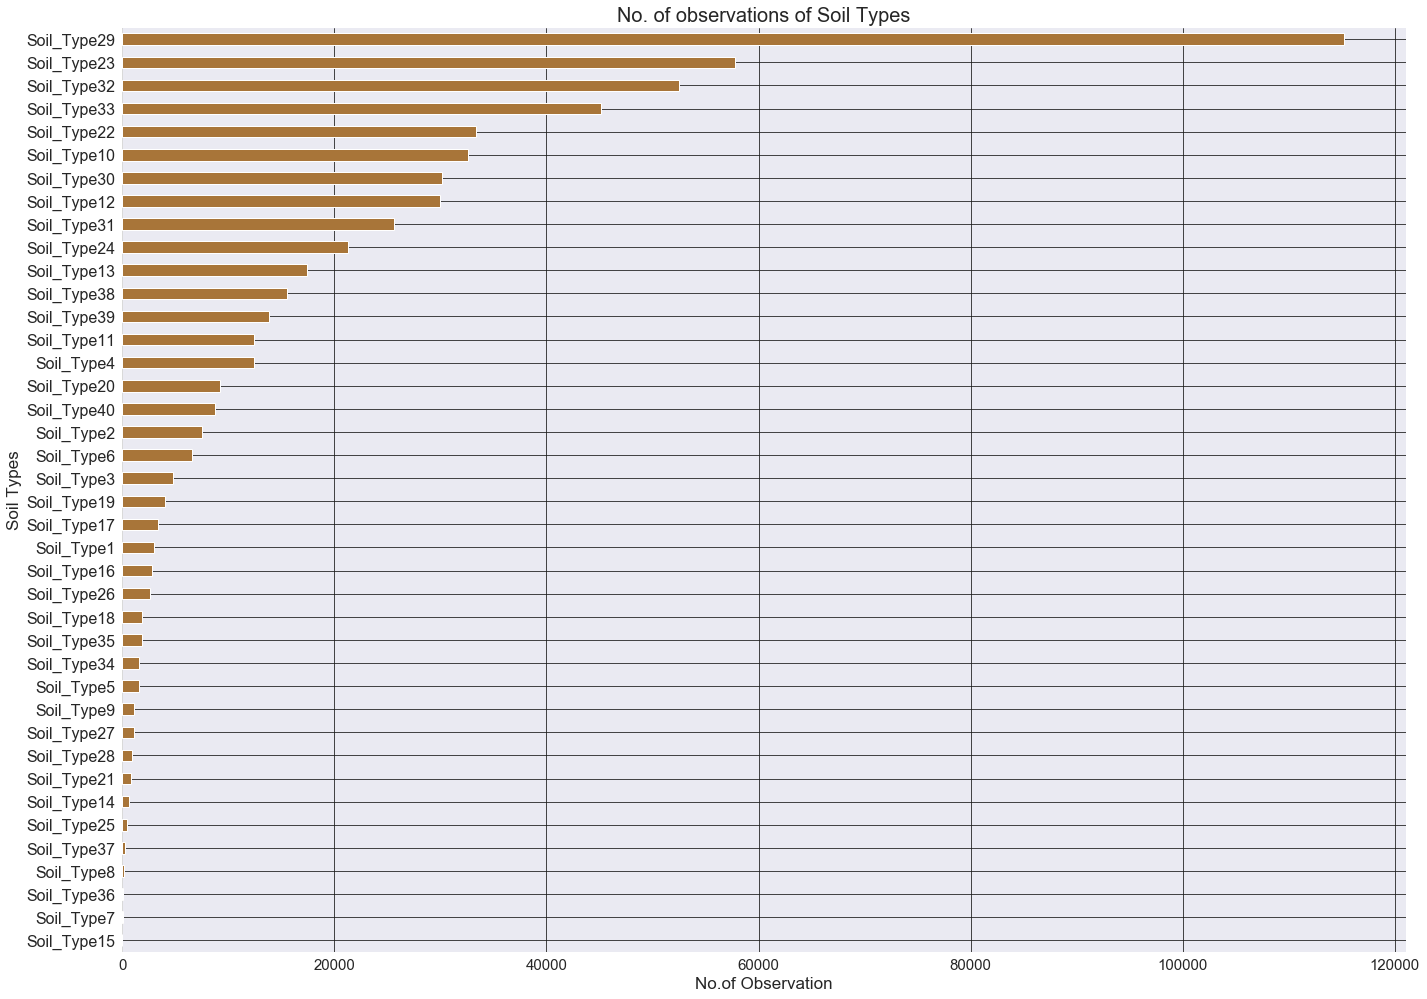

In [44]:
####    3    #####
# Horizontal Bar plot
# Soil Type Count

# plot bg
sns.set_style("darkgrid", {'grid.color': '.1'})

# select all rows and first 4 columns, sum it, and pass it as a series 
soil_type_df = pd.Series(binary_fea.iloc[:,4:].sum())

# will sort values in descending order
soil_type_df.sort_values(ascending = False, inplace = True)

# plot horizontal bar with given size using color defined
soil_type_df.plot(kind='barh', figsize=(23, 17), color= '#a87539')

# horizontal bar flips columns in ascending order, this will filp it to descending
plt.gca().invert_yaxis()

# Title of the graph
plt.title('No. of observations of Soil Types', size = 20)

# Horizontal axis Label
plt.xlabel('No.of Observation', size = 17)
# Vertical axis Label
plt.ylabel('Soil Types', size = 17)

# x-axis label size, setting label rotations
plt.xticks(rotation = 'horizontal', size = 15)
# y-axis label size
plt.yticks(size = 16)

# removing the top and right axes spines, which are not needed
sns.despine()

# display plot
plt.show()

In [18]:
# Exact counts of observations
soil_type_df

Soil_Type29    115246
Soil_Type23     57752
Soil_Type32     52519
Soil_Type33     45154
Soil_Type22     33373
Soil_Type10     32634
Soil_Type30     30170
Soil_Type12     29971
Soil_Type31     25666
Soil_Type24     21278
Soil_Type13     17431
Soil_Type38     15573
Soil_Type39     13806
Soil_Type11     12410
Soil_Type4      12396
Soil_Type20      9259
Soil_Type40      8750
Soil_Type2       7525
Soil_Type6       6575
Soil_Type3       4823
Soil_Type19      4021
Soil_Type17      3422
Soil_Type1       3031
Soil_Type16      2845
Soil_Type26      2589
Soil_Type18      1899
Soil_Type35      1891
Soil_Type34      1611
Soil_Type5       1597
Soil_Type9       1147
Soil_Type27      1086
Soil_Type28       946
Soil_Type21       838
Soil_Type14       599
Soil_Type25       474
Soil_Type37       298
Soil_Type8        179
Soil_Type36       119
Soil_Type7        105
Soil_Type15         3
dtype: int64

- The least observation are of `Soil_Type15` of `3`. Thats why it had most skewed value of all `Soil Types` of `~440` which now makes sense since this feature has value of `0`' for all except for `3` observations hence making it densly concentrated towards `0` and long flat tail to the right having a form of `positively skewed distribution` or `Right Skewed Distribution`.

- `Soil_Type29` has `115,246` observations.

**Next let's compare each feature in our data to our target variable, visualizing how much dense and distributed each taget variable's class is to the feature compared. We will use [Violin Plot](https://datavizcatalogue.com/methods/violin_plot.html) to visualize this, a combination of Box Plot and Density Plot (Histogram).**

## Data Engineering

### Feature Cleaning

In [19]:
# finding columns which have no value (0)
(binary_fea == 0).all()

Wilderness_Area1    False
Wilderness_Area2    False
Wilderness_Area3    False
Wilderness_Area4    False
Soil_Type1          False
Soil_Type2          False
Soil_Type3          False
Soil_Type4          False
Soil_Type5          False
Soil_Type6          False
Soil_Type7          False
Soil_Type8          False
Soil_Type9          False
Soil_Type10         False
Soil_Type11         False
Soil_Type12         False
Soil_Type13         False
Soil_Type14         False
Soil_Type15         False
Soil_Type16         False
Soil_Type17         False
Soil_Type18         False
Soil_Type19         False
Soil_Type20         False
Soil_Type21         False
Soil_Type22         False
Soil_Type23         False
Soil_Type24         False
Soil_Type25         False
Soil_Type26         False
Soil_Type27         False
Soil_Type28         False
Soil_Type29         False
Soil_Type30         False
Soil_Type31         False
Soil_Type32         False
Soil_Type33         False
Soil_Type34         False
Soil_Type35 

In [20]:
# Checking if any observation have more than 1 presence of Wilderness area at same time or None

# Count for more than 1 presence
more_count = 0
# Count for none presence
none_count = 0

#looping through each ron of wilderness area column
for index, row in binary_fea.iloc[:,:4].iterrows():
    # adding the values of each column of that row
    total = row['Wilderness_Area1'] + row['Wilderness_Area2'] + row['Wilderness_Area3'] + row['Wilderness_Area4']
    
    #checking greater than 1
    if total > 1:
        # if found, increment count by 1
        more_count =+ 1
        # reset the total
        total = 0
        # do not execute code below, start from top
        break
        
    #checking for none   
    if total == 0:
        # if found, increment count by 1
        none_count =+ 1
        # reset the total
        total = 0      

# priting results found
print('We have ', more_count, ' observations that shows presence in more than 1 Wilderness Area.')
print('We have ' ,none_count, ' observations that shows no presence in any Wilderness Area.')

We have  0  observations that shows presence in more than 1 Wilderness Area.
We have  0  observations that shows no presence in any Wilderness Area.


### Observation Cleaning

### Duplicates Deleting

### Feature Scaling

## Developing a Model
_Describe the tools and techniques you will use necessary for a model to make a prediction_